# Поиск корней уравнений

Рассмотрим следующее трансцендентное уравнение:

$$\cos{x} = x.$$

Никак не получится преобразовать данное уравнение, чтобы точно определить значение $x$.
Поэтому решают его численно.
Но перед численным решением всегда полезно оценить решение графически, ведь вполне может существовать несколько корней, в то время как численный метод находит только один корень.
В таком случае важно понимать, какой именно корень найден численно.
После этого появится понимание, как изменить параметры решателя так, чтобы он нашёл остальные корни в последующих поисках.

## Графическое построение

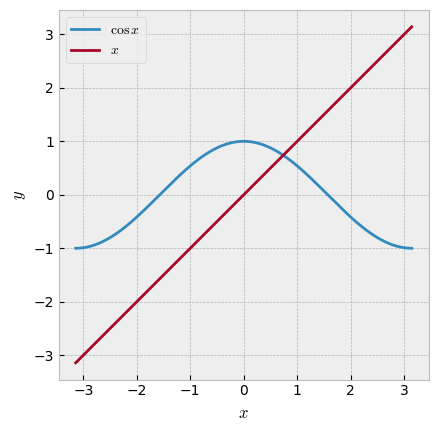

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Исходные данные
# - массив значений аргумента 
# - и двух функций: cos(x) и x
x = np.linspace(-np.pi, np.pi, 300)
y_cos = np.cos(x)
y_x = x.copy()  # Копируем x, чтобы переменные x и y_x
                # не ссылались на одни и те же данные

# Заведём функцию построения графика f(x)
# и сможем строить его в любой момент
def plot_f():
    fig, ax = plt.subplots()
    ax.plot(x, y_cos, label=r"$\cos{x}$")
    ax.plot(x, y_x, label=r"$x$")
    ax.set(xlabel="$x$", ylabel="$y$", aspect="equal")
    ax.legend()
    # Вернём fig и ax, чтобы была возможность
    # достроить и/или изменить график
    return fig, ax

with plt.style.context("bmh"):
    fig, ax = plot_f()
    plt.show()

Итак, в данном случае существует единственный корень $x_{\rm r}$, расположенный где-то между $0.5$ и $1$:
$x_{\rm r} \in (0.5; 1)$.

## Численный поиск корня

Найти корень уравнения $\cos{x} = x$ значит найти такое значение $x_{\rm r}$, при котором значение функции

$$f(x) = \cos{x} - x$$

равно $0$: $f(x_{\rm r}) = 0$.

Рассматриваемая функция $f(x)$ является **скалярной**, т. к. отображает скалярный аргумент $x \in \R$ в скалярное значение $y = f(x) \in \R$.
Помимо скалярных существуют **векторные** функции, зависящие от нескольких аргументов $x_1, x_2, \ldots$, собранных в вектор входных параметров $\mathbf{x}$, однако значение самой функции является скалярной величиной:
$f: \mathbf{x} \rightarrow y$.

Опишем рассмотренную скалярную функцию $f(x)$ в коде:

In [2]:
def f(x):
    return np.cos(x) - x

Функции численного поиска корней содержатся в модуле [`optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html) библиотеки SciPy. То, что указанный модуль называется "оптимизацией", не должно вводить в заблуждение. Дело в том, что численный поиск корней уравнений во многом схож с методами численного поиска экстремумов (минимумов, оптимумов) функций.

Для текущей цели понадобится алгоритм поиска корня скалярной функции [`root_scalar(...)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar).
Импортируем:

In [3]:
from scipy.optimize import root_scalar

Найдём корень. Для этого нужно вызвать функцию `root_scalar(...)` с необходимыми аргументами.
Первым аргументом передаётся имя целевой функции: в нашем случае `f`.
Далее необходимо задать метод поиска корня уравнения.
Их существует большое множество, и все они подробно описаны в документации SciPy - выбор за программистом.

Выбрать метод можно явно, задав параметр `method="newton"` (например, метод Ньютона), или неявно.
Например, ниже задаётся интервал оси $Ox$, на котором предполагается нахождение корня.
В этом случае, если явно не указан метод, он будет назначен автоматически (в данном случае используется метод `"brentq"`):

In [4]:
res = root_scalar(f, bracket=(0.5, 1.))

Посмотрим, какая информация содержится в результате `res`:

In [5]:
res

      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.7390851332151606

Информация следующая:

* `converged: True` и `flag: converged` - корень успешно найден, решение сошлось;
* `function_calls: 8` - целевая функция `f` была вызвана 8 раз;
* `iterations: 7` - алгоритм поиска завершился за 7 итераций;
* `root: 0.7390851332151606` - искомый корень.

Служебная информация (всё, кроме `root`) позволяет оценивать эффективность использованного алгоритма.
За чем меньшее число итераций выполняется алгоритм, чем меньше раз вызывается целевая функция - тем быстрее выполняется алгоритм.

Сохраним гайденный корень в отдельной переменной:

In [6]:
root = res.root
root

0.7390851332151606

Перестроим график и отметим на нём найденное решение.
Функции `plot(...)` передадим `root` в качестве аргумента `x`, а в качестве аргумента `y` можно передать либо `np.cos(root)`, либо просто `root`, т. е. нужно подставить `root` в любую из двух частей уравнения:

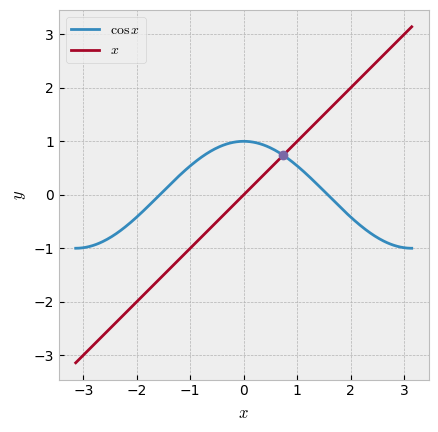

In [7]:
with plt.style.context("bmh"):
    fig, ax = plot_f()
    ax.plot(
        root, root,
        ls="", marker="o", label="Корень"
    )
    plt.show()

Действительно, найдено верное решение уравнения.

Мы рассматриваем очень простое трансцендентное уравнение $\cos{x} = x$.
Простое оно потому, что имеет единственный корень и рассчитывается довольно быстро.
В учебном процессе встречаются более сложные уравнения, для поиска корней которых требуется грамотно выбрать метод численного решения. Ниже приведён пример решения того же уравнения методом Ньютона.

## Поиск корня другим методом

Найдём корень методом Ньютона (залючим вызов `root_scalar(...)` в блок `try...except`, т. к. первые попытки будут приводить в ошибкам):

In [8]:
try:
    res = root_scalar(f, method="newton")
except Exception as ex:
    # Перехватили исключение,
    # чтобы не рушить интерпретатор
    print(ex)

x0 must not be None for newton


В возникшем исключении содержится сообщение, что для метода `newton` необходимо задать `x0` - начальное значение аргумента. Сделаем это, учтя, что корень расположен вблизи $x = 0.5$:

In [9]:
res = root_scalar(f, method="newton", x0=0.5)
res

      converged: True
           flag: converged
 function_calls: 8
     iterations: 4
           root: 0.7390851332151607

Получили то же значение $x_{\rm r}$, что и предыдущим методом `brentq`.
Посмотрим, изменятся ли параметры решения (число вызовов функции и итераций алгоритма), если изменится начальное приближение `x0`:

In [10]:
# Пусть x0 выбрано очень не удачно,
# т. е. вдали от решения
res = root_scalar(
    f, method="newton", x0=-3
)
res

      converged: True
           flag: converged
 function_calls: 52
     iterations: 26
           root: 0.7390851332151607

Как видно, количество `function_calls` и `iterations` возросло более чем в 6 раз.
Будь на месте $f(x)$ более сложная функция, одно вычисление которой занимало бы 1 минуту, то суммарное время поиска корня увеличилось бы с 8 мин. до 52 мин.

Метод Ньютона использует знание о производных функции.
Если производная не задана методу явно, то её вычисление производится численно "под капотом".
Мы можем попробовать исправить возникшую ситуацию, явно передав производную `f` в функцию `root_scalar(...)`.
Производная $f(x)$ имеет вид:

$$f'(x) = -\sin{x} - 1.$$

In [11]:
def f_der(x):
    return -np.sin(x) - 1

res = root_scalar(f, method="newton", x0=-3, fprime=f_der)
res

      converged: False
           flag: convergence error
 function_calls: 100
     iterations: 50
           root: 96828.86833692511

Катастрофа!
Мало того, что число вызовов функции увеличилось на порядок, так ещё и корень не найден!
Так бывает довольно часто. Мы смогли построить уравнение графически, оценив значение корня.
На практике может случиться так, что и построение графика затруднительно.
Представьте, что вам нужно решать сложное уравнение 1000 раз при различных значениях параметров, из-за чего корень каждый раз будет в новых пределах.
И каждый из 1000 раз вам нужно вручную оценивать значение корня.
Сколько времени это займёт? Очевидно, достаточно, чтобы провести за этим занятием лучшие годы жизни.
Нужно уметь решать уравнения численно в общем виде.

В данном случае проблема применения метода Ньютона обусловлена периодичностью функции $\cos{x}$ - части целевой функции $f(x)$. График $f(x)$ показан ниже:

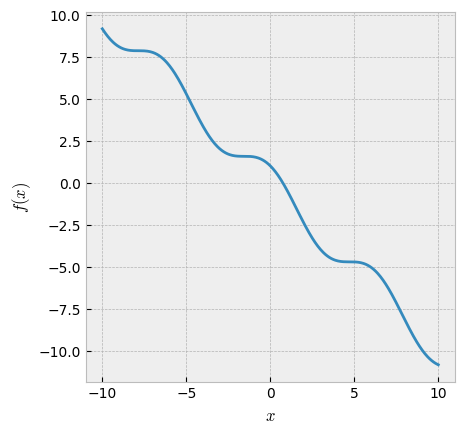

In [12]:
# Для наглядности возьмём диапазон x побольше
x = np.linspace(-10, 10, 500)

with plt.style.context("bmh"):
    fig, ax = plt.subplots()
    ax.plot(x, np.cos(x) - x)
    ax.set(xlabel="$x$", ylabel="$f(x)$", aspect="equal")
    plt.show()

Периодичность уравнения может приводить к появлению локальных минимумов (вот и связь с оптимизацией) или точек перегиба функции $f(x)$, из которых метод Ньютона выбраться не способен, т. к. теряет информацию о поведении целевой функции из-за обнуления её производных в таких точках.
Неудачная точка `x0=-3` неудачна как раз из-за того, что находится очень близко к точке перегиба $f(x)$.

А как поведёт себя метод `brentq` в случае задания очень широкого диапазона поиска?
Посмотрим:

In [13]:
res = root_scalar(f, method="brentq", bracket=(-100, 100))
res

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.7390851332151586

[Метод Брента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) отлично справляется с задачай, причём число вызовов целевой функции почти не изменилось!
Не зря данный метод считается одним из самых надёжных в библиотеке SciPy.

```{attention}
Заметьте, что значение `root` немного отличается от найденного этим же методом ранее.
**Численные методы никогда не дают абсолютно точный результат при различных исходных данных!**
```

Таким образом, при численном поиске корней уравнения необходимо понимать сильные и слабые стороны методов поиска, а также помнить о возможности наличия нескольких корней уравнения и о возможном появлении локальных минимумов целевой функции $f(x)$.
К численному решению уравнений (в том числе и дифференциальных) требуется подходить с умом (как и ко всему в этом мире).

Таковы основы численного поиска корней уравнений.
Больше информации вы найдёте в официальной документации используемых вами библиотек.